<a href="https://colab.research.google.com/github/Niharshith-2044/AIML_2303A52044/blob/main/LAB_EXAM_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Pat

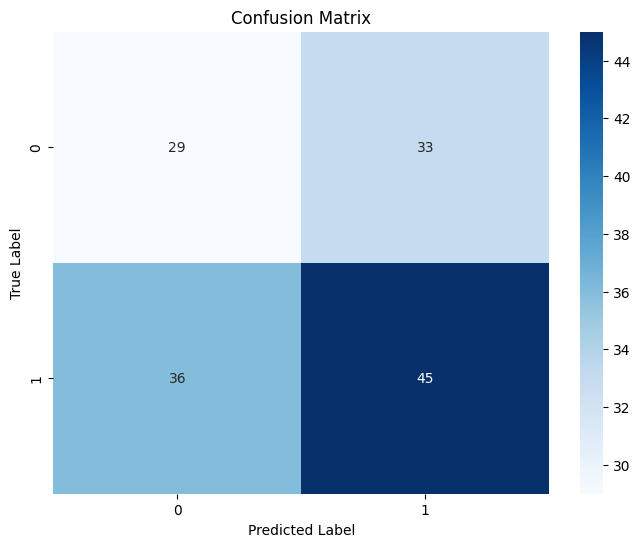


Feature Importance Table:
                                       Feature  Importance
4                                Dental Health    0.164298
3                                Mental Health    0.142550
2                              Phyiscal Health    0.139329
0                    Number of Doctors Visited    0.098564
11                            Trouble Sleeping    0.079379
13                                        Race    0.068911
5                                   Employment    0.064400
9   Bathroom Needs Keeps Patient from Sleeping    0.057460
10          Uknown Keeps Patient from Sleeping    0.050515
8             Pain Keeps Patient from Sleeping    0.042606
6           Stress Keeps Patient from Sleeping    0.038356
12               Prescription Sleep Medication    0.037449
7       Medication Keeps Patient from Sleeping    0.016184
1                                          Age    0.000000

Feature Importance Table:
                                       Feature  Importance
4 

<Figure size 1000x600 with 0 Axes>

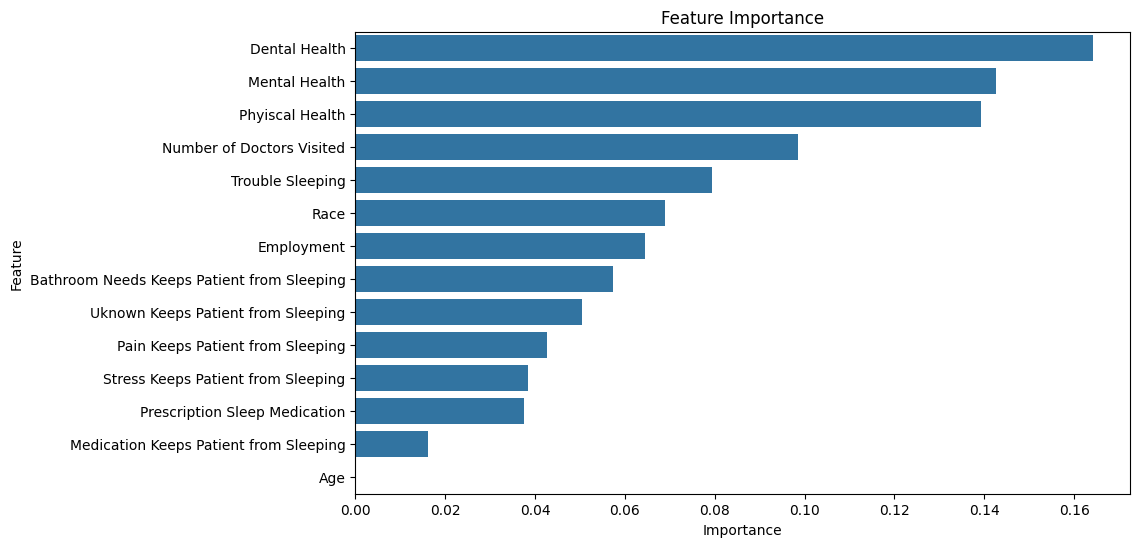

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/NPHA-doctor-visits.csv')

print("Dataset Information: ")
print(df.info())
print("\nSummary Statistics: ")
print(df.describe())
print("\nMissing Values Count: ")
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)
print("\nColumns in dataset: ", df.columns)
target_column = 'visits'
categorical_columns = ['gender', 'community', 'category']
for column in categorical_columns:
    if column not in df.columns:
        print(f"Warning: Column '{column}' not found in DataFrame. Skipping label encoding for this column.")
    else:
        df[column] = label_encoder.fit_transform(df[column])

X = df.drop(columns=['Gender'])
y = df['Gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nClassification Report: ")
report = classification_report(y_test, y_pred, output_dict=True)
print(pd.DataFrame(report).transpose())
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance Table:")
print(importance_df)
plt.figure(figsize=(10, 6))
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance Table:")
print(importance_df)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()